In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [4]:
milk.head(5)

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


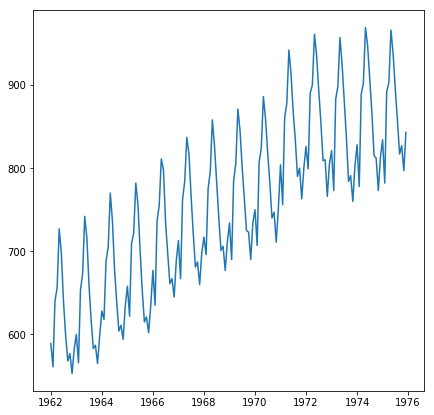

In [5]:
plt.figure(1, figsize=(7,7))
plt.plot(milk.milk)

In [6]:
import statsmodels.api as sm
print "pvalue - ", sm.tsa.stattools.adfuller(milk.milk)[1]

C:\Users\KONYAYEV.MAKSIM\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


pvalue -  0.627426708603


In [7]:
milk.milk_corrected = milk.milk / milk.index.days_in_month
milk.milk_corrected.head(5)

month
1962-01-01    19.000000
1962-02-01    20.035714
1962-03-01    20.645161
1962-04-01    21.866667
1962-05-01    23.451613
Name: milk, dtype: float64

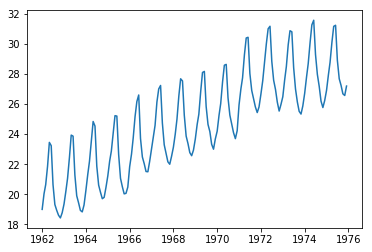

In [8]:
plt.plot(milk.milk_corrected)

In [9]:
import numpy as np
np.sum(milk.milk_corrected)

4166.326661899464

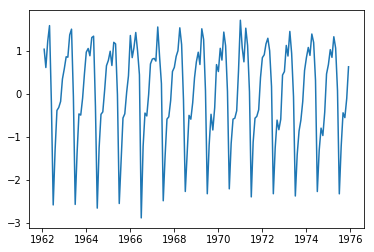

In [10]:
milk.daily_diff1 = milk.milk_corrected - milk.milk_corrected.shift(1)
plt.plot(milk.daily_diff1)

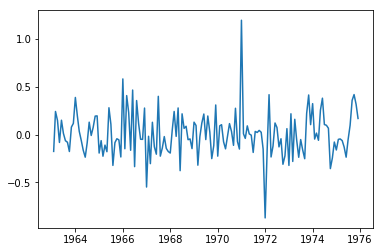

In [11]:
milk.daily_diff1_diff_seson = milk.daily_diff1 - milk.daily_diff1.shift(12)
plt.plot(milk.daily_diff1_diff_seson)

In [21]:
import statsmodels.tsa.stattools as stool

In [27]:
stool.adfuller(milk.daily_diff1_diff_seson.dropna())[1]

2.2808455518037347e-06

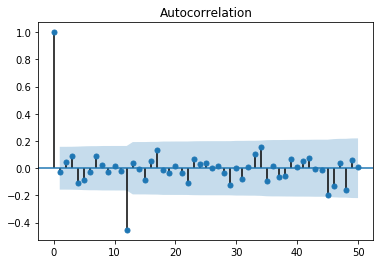

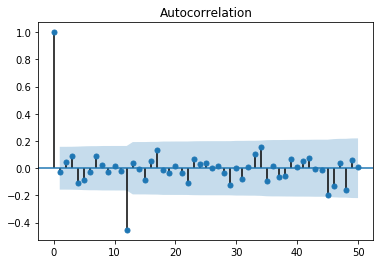

In [28]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff1_diff_seson.dropna().values.squeeze(), lags=50)

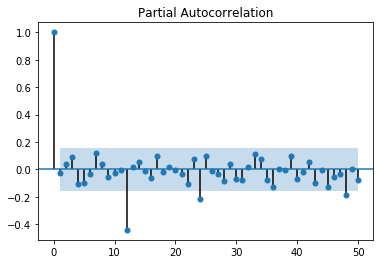

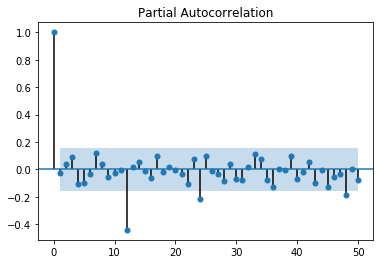

In [29]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff1_diff_seson.dropna().values.squeeze(), lags=50)